 <p style="margin: 0; padding: 0; background-color: black; color: white; text-align: left; font-size: 2em; padding: 20px;">
  Train Model </p>

## Load Important Libraries and Data

In [ ]:
#Installing the xgboost library
!pip install xgboost

In [1]:
# data loading and wrangling libraries for EDA
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# data splitting
from sklearn.model_selection import train_test_split

# ml models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Cross validation
from sklearn.model_selection import KFold, cross_val_score

# ML model evaluation
from sklearn.metrics import accuracy_score, classification_report

# warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the data
df = pd.read_excel(r'C:\Users\MohammedR\Desktop\IABAC PROJECT\data\processed\INX_future_inc_employee_cleaned_dataset.xlsx')

In [2]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


## Preprocessing the data for ML models

In [3]:
# lets prepare our dataset into categorical and numerical data

cat_df = df.select_dtypes(['object','bool'])
num_df = df.select_dtypes(['int64', 'float64'])

# Applying the OneHotEncoding technique for Categorical features
cat_df = pd.get_dummies(cat_df)

# concatonate the categorical and numerical datasets to make one prepared dataset for RandomForest model
ml_df = pd.concat([cat_df, num_df], axis=1)

# Splitting the dataset into X=features and y=target 
X = ml_df.iloc[:, :-1]
y = ml_df.PerformanceRating

# now lets perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=44)

In [4]:
X_train

,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,...,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
377,1,0,0,0,0,1,0,0,0,0,...,1,14,1,20,3,1,20,7,1,8
538,0,1,0,1,0,0,0,0,0,1,...,6,14,2,10,2,2,3,2,0,2
747,1,0,0,1,0,0,0,0,0,0,...,1,16,3,9,2,3,9,0,1,7
137,0,1,0,0,0,1,0,0,1,0,...,6,13,3,22,3,4,17,13,15,2
228,0,1,0,0,1,0,0,0,0,0,...,7,16,3,10,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,1,0,0,0,1,0,0,0,0,...,5,14,4,8,2,3,2,1,2,2
96,1,0,0,1,0,0,0,0,0,0,...,6,18,3,33,0,3,12,9,3,8
571,0,1,0,0,0,1,0,0,0,0,...,1,14,2,21,3,2,21,8,12,8
1197,0,1,0,0,0,1,0,0,0,1,...,1,11,3,20,3,3,20,8,3,8


## Balancing the dataset using imblearn

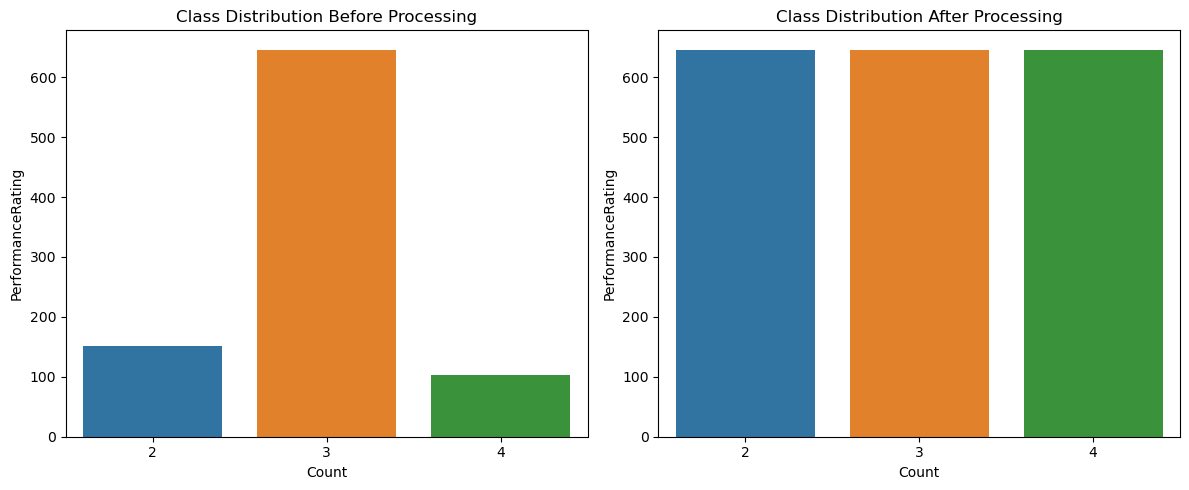

In [5]:
# Define oversampling and undersampling techniques
oversampling = SMOTE()
undersampling = RandomUnderSampler()

# Define pipeline steps
steps = (('o', oversampling), ('u', undersampling))
pipeline = Pipeline(steps=steps)

# Apply the pipeline
X_bal, y_bal = pipeline.fit_resample(X_train, y_train)

# Visualization of class distribution before and after processing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before processing
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before Processing')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('PerformanceRating')

# After processing
sns.countplot(x=y_bal, ax=axes[1])
axes[1].set_title('Class Distribution After Processing')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('PerformanceRating')

plt.tight_layout()
plt.show()

## Model selection using K-Fold Cross validation


K-Fold Cross-Validation is a resampling technique used in machine learning to assess the performance of a model. The basic idea is to split the dataset into K folds (subsets), train the model K times, each time using K-1 folds for training and one fold for validation. This process helps to get a more reliable estimate of your model's performance by evaluating it on multiple subsets of the data

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#Encoding the target variable into [0,1,2] class instead of [2,3,4] to be recognised by the XGBoost ML
y_train_encoded = label_encoder.fit_transform(y_train)

In [7]:
# lets create a model dictionary that will be used by cross validation to perform K-Fold on each of the models
models = {
    'logr': LogisticRegression(),
    'knn': KNeighborsClassifier(n_neighbors=2),
    'Kmeans': KMeans(n_clusters=3),
    'naive_bayes': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(128, 96, 32, 3), activation='relu'),
    'RandomF': RandomForestClassifier(n_estimators=800),
    'GrdBoostClassifier': GradientBoostingClassifier(n_estimators=800),
    'XGBoost': XGBClassifier(n_estimators=900, objective='multi:softprob', eval_metric='merror')

}

model_report = {}
for key, value in models.items():
    
    # lets first create k folds of our dataset
    kfold = KFold(n_splits=10, random_state=15, shuffle=True)
    
    # now lets train and varify each model's cross validations score
    cv_report = cross_val_score(value, X_train, y=y_train_encoded, cv=kfold, scoring='accuracy')
    model_report.update(**{
        key: (cv_report, cv_report.mean(), cv_report.std())
    })

### Plotting the results to find out the best performing model so that we can further perform Hyperparameter tuning for that model and train it

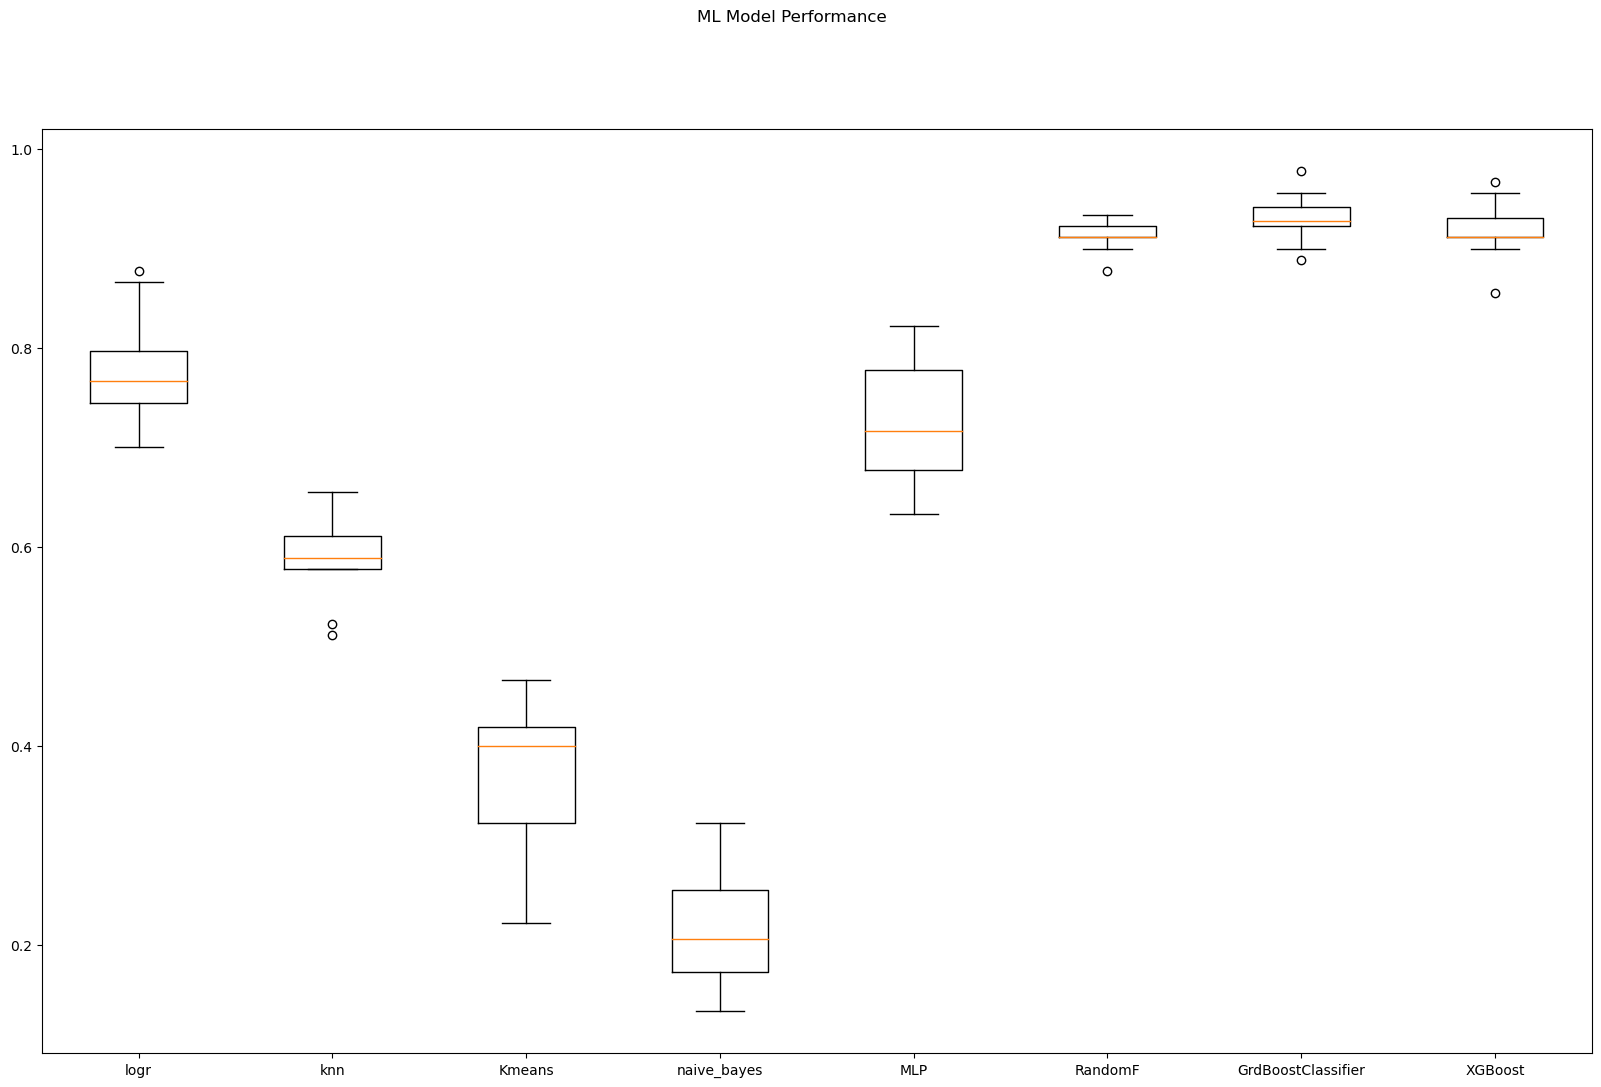

In [8]:
fig = plt.figure(figsize=(20,12))

fig.suptitle('ML Model Performance')
ax = fig.add_subplot(1,1,1)
plt.boxplot([value[0] for value in model_report.values()])
ax.set_xticklabels([key for key in model_report.keys()])
plt.show()

### Selected ML models

According to the graph abose we can see clearly that __GradientBoostClassifier__ and __XGBClassifier__ have the best performance hence our selected models for training are:

1. __GradientBoostClassifier__
2. __XGBClassifier__

Now lets perform Hyperparameter tuning for these two models to figure out the best model and best parameters for the model

## Hyperparameter tuning on GradientBoostClassifier

we shall use the sklearn's GridSearchCV to perform hyperparameter tuning and we shall use the parameter grid to select the best combination of parameters to provide us with the best possible results.

Common techniques for hyperparameter tuning include grid search and random search.

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [10]:
# lets first create the hyperparameter grid

gb_params ={
    'n_estimators': [700, 800, 900],
    'learning_rate' : [0.1,0.2],
    'max_depth': [9, 10, 11],
    'min_samples_leaf': [2,3],
    'subsample': [0,1],
    'max_features' : ['auto','sqrt','log2'],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae']
}

# Define the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Create the random search object
random_search = RandomizedSearchCV(
    estimator=gb_clf, 
    param_distributions=gb_params, 
    n_iter=50, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42)

# Fit the random search to the data
random_search.fit(X_bal, y_bal)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best model from the random search
best_gb_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_val = best_gb_model.predict(X_bal)
accuracy = accuracy_score(y_bal, y_pred_val)
print(f"Validation Accuracy with Best Model: {accuracy:.4f}")

Best Hyperparameters: {'subsample': 1, 'n_estimators': 900, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 9, 'learning_rate': 0.1, 'criterion': 'squared_error'}
Best Score: 0.9649298063347451
Validation Accuracy with Best Model: 1.0000


## Hyperparameter tuning on XGBClassifier

In [11]:
#Encoding the target variable into [0,1,2] class instead of [2,3,4] to be recognised by the XGBoost ML
y_bal_encoded = label_encoder.fit_transform(y_bal)

In [12]:
# Define the hyperparameter distributions to sample from
param_dist = {
    'n_estimators': np.arange(50, 1000, 50),
    'learning_rate': np.logspace(-3, 0, 100),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 6),
    'subsample': np.linspace(0.8, 1.0, 10),
    'colsample_bytree': np.linspace(0.8, 1.0, 10)
}


# Define the XGBClassifier
xgb_clf = XGBClassifier()


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=xgb_clf, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42)

# Fit the random search to the data
random_search.fit(X_bal, y_bal_encoded)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Scoree:", random_search.best_score_)

# Get the best model from the random search
best_xgb_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_val = best_xgb_model.predict(X_bal)
accuracy = accuracy_score(y_bal_encoded, y_pred_val)
print(f"Validation Accuracy with Best Model: {accuracy:.4f}")


Best Hyperparameters: {'subsample': 0.8666666666666667, 'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.24770763559917114, 'colsample_bytree': 0.9333333333333333}
Best Scoree: 0.9587375795838995
Validation Accuracy with Best Model: 1.0000


## CONCLUSION

"On this dataset, I used only the RandomizedSearchCV technique to find the best parameters for our machine learning model. The use of random search was preferable due to its speed and resource optimization. For better results, we can work with the GridSearchCV method, which will try all possible combinations of parameters provided in the parameter grid.."


NB : Comparaison between GridSearchCV and RandomizedSearchCV :

<!DOCTYPE html>
<html>
<head>
  <style>
    table {
      border-collapse: collapse;
      width: 100%;
    }

    th, td {
      border: 1px solid #dddddd;
      text-align: left;
      padding: 8px;
    }

    th {
      background-color: #f2f2f2;
    }
  </style>
</head>
<body>

<table>
  <tr>
    <th style="text-align:left;">Aspect</th>
    <th style="text-align:left;">GridSearchCV</th>
    <th style="text-align:left;">RandomizedSearchCV</th>
  </tr>
  <tr>
    <td style="text-align:left;">Search Method</td>
    <td style="text-align:left;">Exhaustive search over specified parameter grid</td>
    <td style="text-align:left;">Random sampling of hyperparameter combinations</td>
  </tr>
  <tr>
    <td style="text-align:left;">Number of Combinations</td>
    <td style="text-align:left;">Tries all combinations in the specified grid</td>
    <td style="text-align:left;">Randomly samples a fixed number of combinations</td>
  </tr>
  <tr>
    <td style="text-align:left;">Computation Efficiency</td>
    <td style="text-align:left;">Can be computationally expensive, especially with large grids</td>
    <td style="text-align:left;">Generally more computationally efficient, suitable for large search spaces</td>
  </tr>
  <tr>
    <td style="text-align:left;">Search Space Exploration</td>
    <td style="text-align:left;">Comprehensive, covers the entire parameter grid</td>
    <td style="text-align:left;">Efficient exploration, especially when the search space is vast</td>
  </tr>
  <tr>
    <td style="text-align:left;">Guarantee of Optimality</td>
    <td style="text-align:left;">Guarantees finding the optimal combination within the specified grid</td>
    <td style="text-align:left;">No guarantee of finding the global optimum, but high chance of finding good configurations</td>
  </tr>
  <tr>
    <td style="text-align:left;">Flexibility</td>
    <td style="text-align:left;">Suitable for small search spaces or when computational resources are not a limitation</td>
    <td style="text-align:left;">Suitable for large search spaces and resource optimization</td>
  </tr>
  <tr>
    <td style="text-align:left;">Implementation</td>
    <td style="text-align:left;">`GridSearchCV` from scikit-learn</td>
    <td style="text-align:left;">`RandomizedSearchCV` from scikit-learn</td>
  </tr>
</table>

</body>
</html>
